<a href="https://colab.research.google.com/github/SEJUNTONY/Data_Science_Class/blob/minkyu/%EC%B2%AD%EB%AC%BC%ED%8F%AC21%EA%B8%B0_%EB%8D%B0%EC%82%AC_1110_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 청물포 21기 데이터 사이언스 (11월 3일 수요일)

## 범주형 변수 & 탐색적 데이터 분석

### 1. 라이브러리 로드

In [2]:
# 기본적으로 pandas, numpy, matplotlib, seaborn을 불러온다
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# seaborn 라이브러리에 기본으로 내장된 데이터 셋을 가져온다
df = sns.load_dataset("mpg")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [5]:
# head를 통해 데이터셋 일부만 가져온다
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
# tail을 통해 데이터셋 일부만 가져온다
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [7]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [14]:
# 결측치 확인
df.isnull().mean() * 100

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
name            0.000000
dtype: float64

In [17]:
# object에 대한 자료들만의 기술통계 보기 (describe)
df.describe(include = "object")

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


### 2. 범주형 변수

*   범주형 데이터 유일값의 빈도수



In [39]:
# nunique 값 보기
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

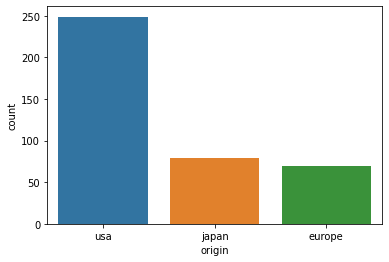

In [40]:
# countplot으로 origin 빈도수 시각화
sns.countplot(data=df, x="origin")


### 3. 1개 변수의 빈도수


In [24]:
# origin의 빈도수 구하기
df["origin"].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

### 4. 2개 이상의 변수에 대한 빈도수

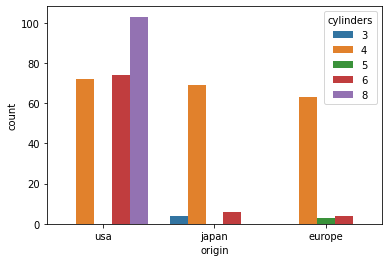

In [25]:
# countplot으로 origin의 빈도수 시각화, cylinder로 다른 색상 표현
sns.countplot(data = df, x = "origin", hue = "cylinders")

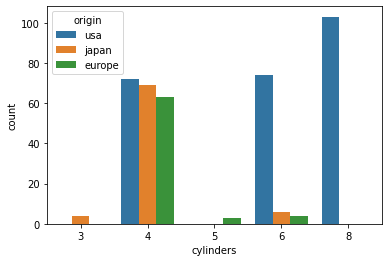

In [26]:
# countplot으로 cylinder의 빈도수 시각화, origin으로 다른 색상 표현
sns.countplot(data = df, x = "cylinders", hue = "origin")

In [27]:
# pd.crosstab
pd.crosstab(df["origin"],df["cylinders"])

cylinders,3,4,5,6,8
origin,,,,,
europe,0,63,3,4,0
japan,4,69,0,6,0
usa,0,72,0,74,103


### 5. 범주형 vs 수치형 변수

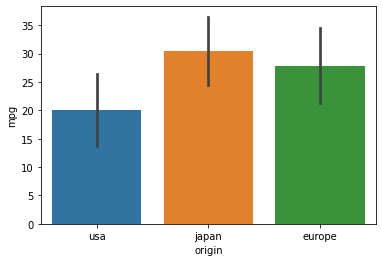

In [28]:
# barplot으로 origin 별 mpg 값 구하기
# 검은선 신뢰구간
# ci = "sd" : 표준편차
# 기본값 : 신뢰구간 95%
sns.barplot(data = df, x = "origin", y="mpg", ci = "sd")


In [29]:
# groupby를 통해 origin 별로 그룹화, mpg의 평균 구하기
# 앞에는 소괄호, 뒤에는 대괄호
df.groupby("origin")["mpg"].mean()


origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

In [30]:
# pivot table을 통한 연산
pd.pivot_table(data = df, index = "origin", values="mpg")

,mpg
origin,
europe,27.891429
japan,30.450633
usa,20.083534


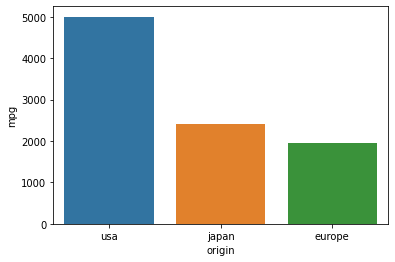

In [32]:
# barplot으로 합계 구하기
sns.barplot(data = df, x = "origin", y = "mpg", estimator=np.sum, ci=None)

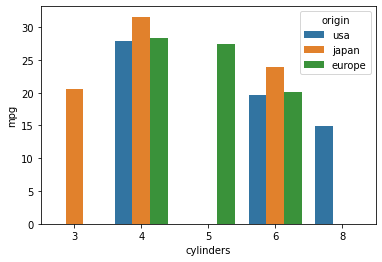

In [33]:
# barplot에 hue를 사용하여 색상을 다르게 표현해보기
sns.barplot(data = df, x = "cylinders", y = "mpg", ci=None, hue = "origin")

In [34]:
# groupby를 통해, 위 시각화에 대한 값 구하기
df.groupby(["cylinders","origin",])["mpg"].mean().unstack()

origin,europe,japan,usa
cylinders,,,
3,NaN,20.550000,NaN
4,28.411111,31.595652,27.840278
5,27.366667,NaN,NaN
6,20.100000,23.883333,19.663514
8,NaN,NaN,14.963107


In [37]:
# pivot_table을 통해 위 시각화에 대한 값을 구하기
pd.pivot_table(data = df, index = "cylinders", columns = "origin", values = "mpg")

origin,europe,japan,usa
cylinders,,,
3,NaN,20.550000,NaN
4,28.411111,31.595652,27.840278
5,27.366667,NaN,NaN
6,20.100000,23.883333,19.663514
8,NaN,NaN,14.963107


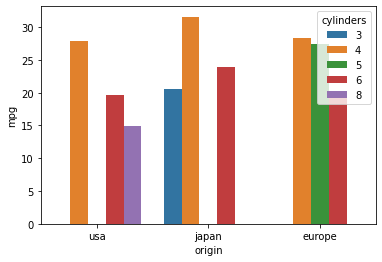

In [38]:
# cylinders와 mpg의 x, hue 값을 변경해서 시각화
sns.barplot(data = df, x = "origin", y = "mpg", hue = "cylinders", ci = None )

### 6.boxplot과 사분위수


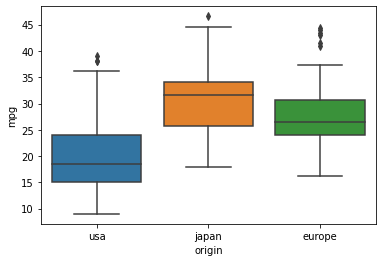

In [42]:
# boxplot으로 origin별 mpg의 기술통계 값 구하기
sns.boxplot(data = df, x = "origin", y = "mpg")

In [ ]:
# groupby로 origin 값에 따른 기술통계 구하기
# 결과를 변수에 할당하여 재사용하기


In [ ]:
# boxplot에 대한 이해

In [43]:
# 1QR, 이상치를 제외한 최댓값, 최솟값 구하기
origin_desc = df.groupby("origin")["mpg"].describe()
europe = origin_desc.loc["europe"]
europe

count    70.000000
mean     27.891429
std       6.723930
min      16.200000
25%      24.000000
50%      26.500000
75%      30.650000
max      44.300000
Name: europe, dtype: float64

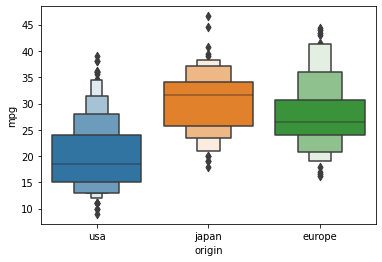

In [44]:
# boxenplot 그리기
sns.boxenplot(data = df, x = "origin", y = "mpg")

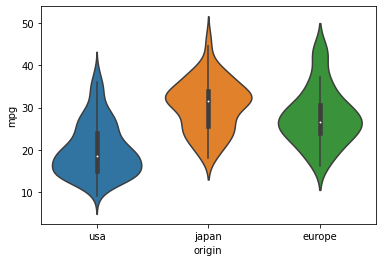

In [45]:
# violinplot 그리기
sns.violinplot(data = df, x = "origin", y = "mpg")

### 7.산점도를 통한 범주형 데이터 표현


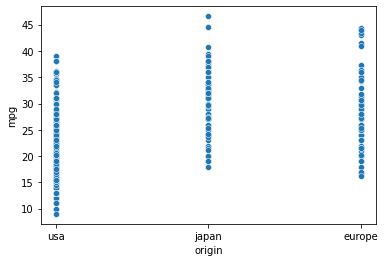

In [65]:
# scatterplot으로 범주형 변수 그리기
sns.scatterplot(data = df, x = "origin", y = "mpg")

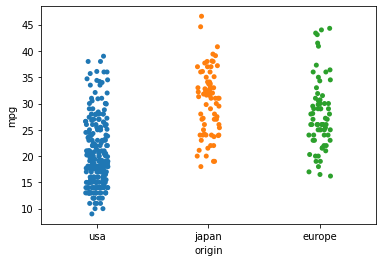

In [66]:
# stripplot
sns.stripplot(data = df, x = "origin", y = "mpg")

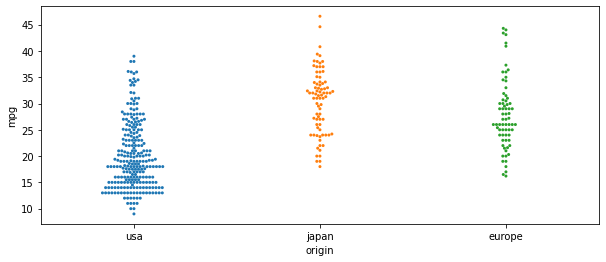

In [70]:
# swarmplot
plt.figure(figsize=(10,4))
sns.swarmplot(data = df, x = "origin", y = "mpg", size = 3)

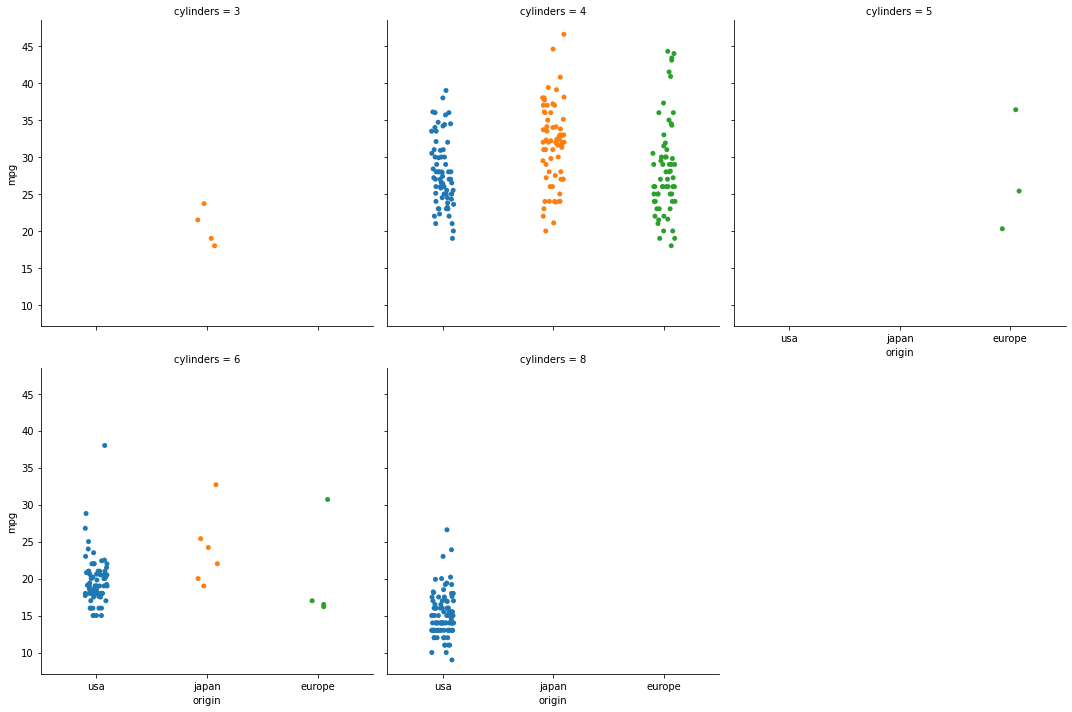

In [71]:
# catplot
sns.catplot(data = df, x = "origin", y = "mpg", col = "cylinders", col_wrap=3)

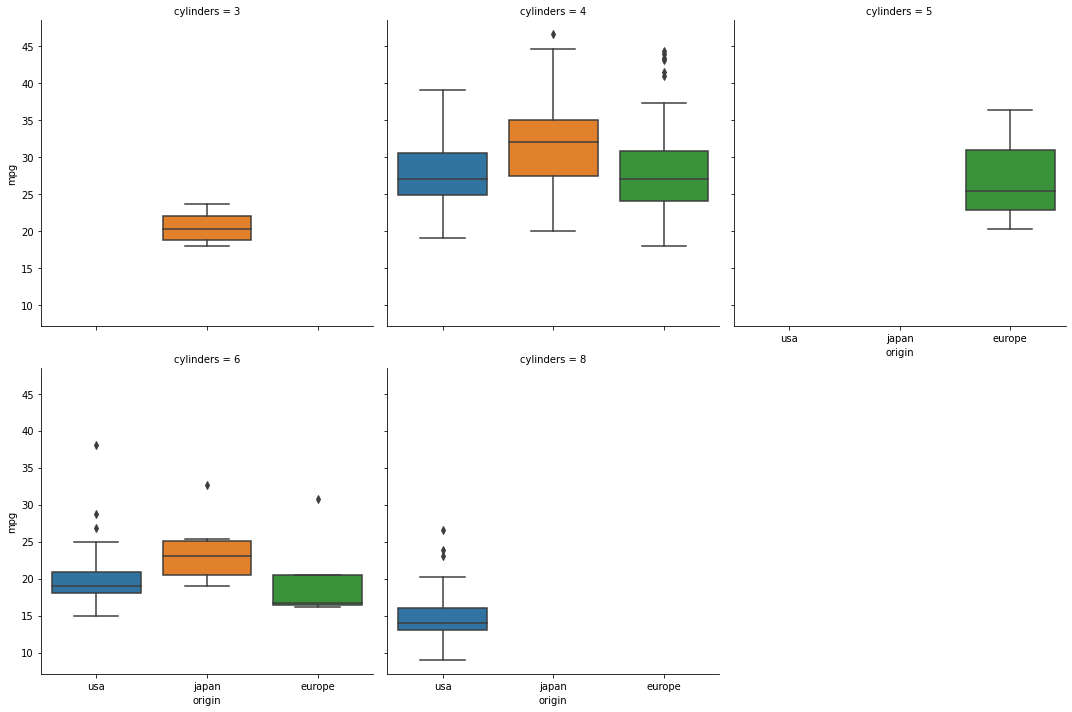

In [72]:
# catplot으로 boxplot 그리기
sns.catplot(data = df, x = "origin", y = "mpg", col = "cylinders", col_wrap=3, kind="box")

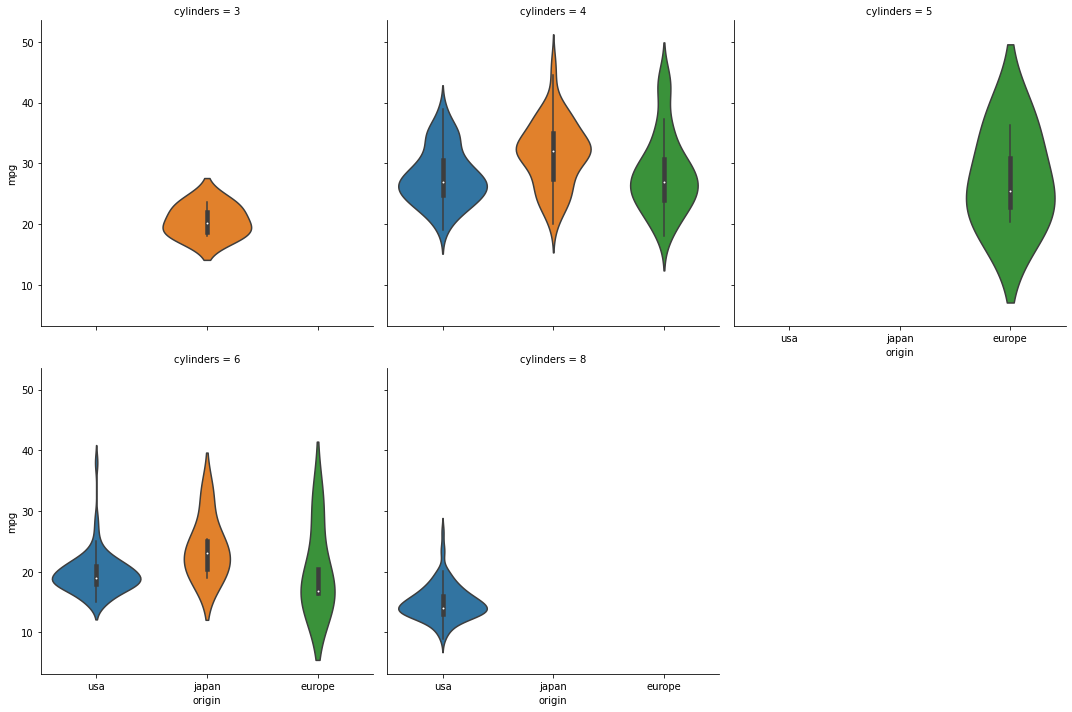

In [73]:
# catplot으로 violinplot 그리기
sns.catplot(data = df, x = "origin", y = "mpg", col = "cylinders", col_wrap=3, kind = "violin")

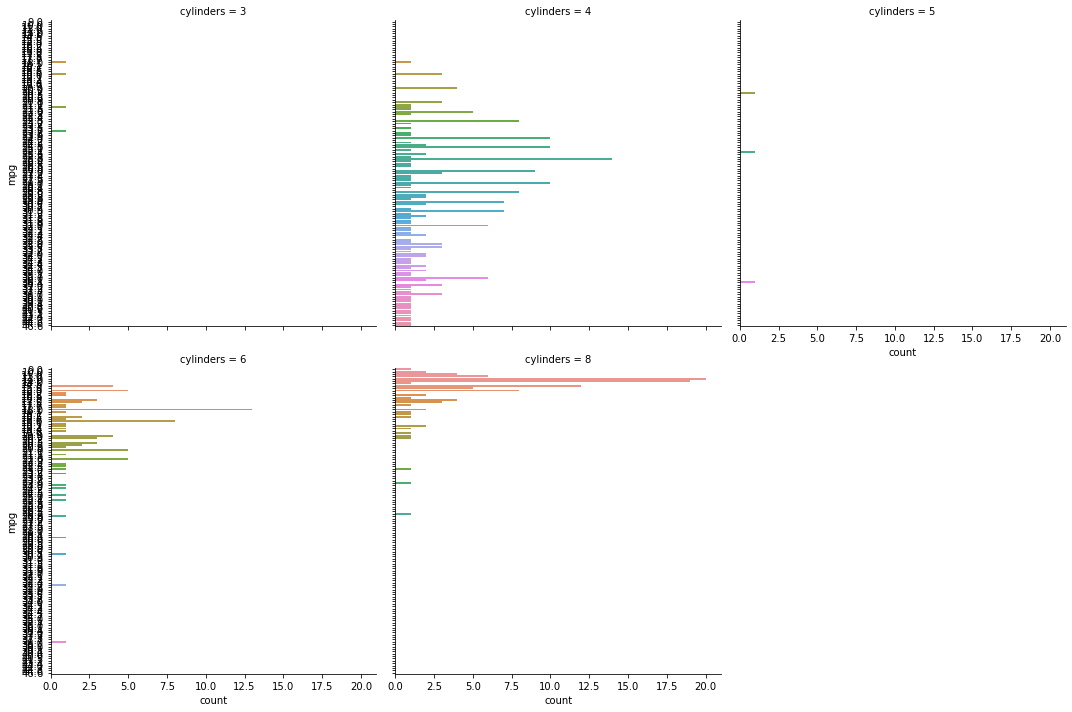

In [74]:
# catplot으로 countplot 그리기
sns.catplot(data = df, y = "mpg", col = "cylinders", col_wrap=3, kind = "count")

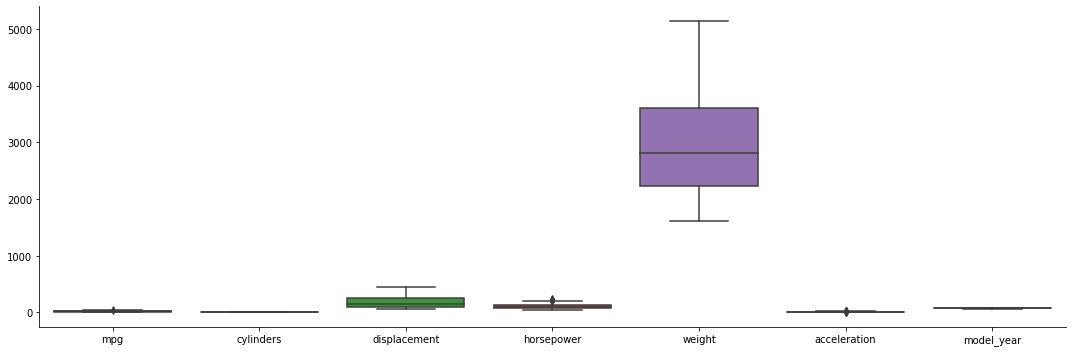

In [75]:
# catplot으로 boxplot 그리기
# df 전체를 넣고 시각화하기
sns.catplot(data = df, kind="box", aspect = 3)

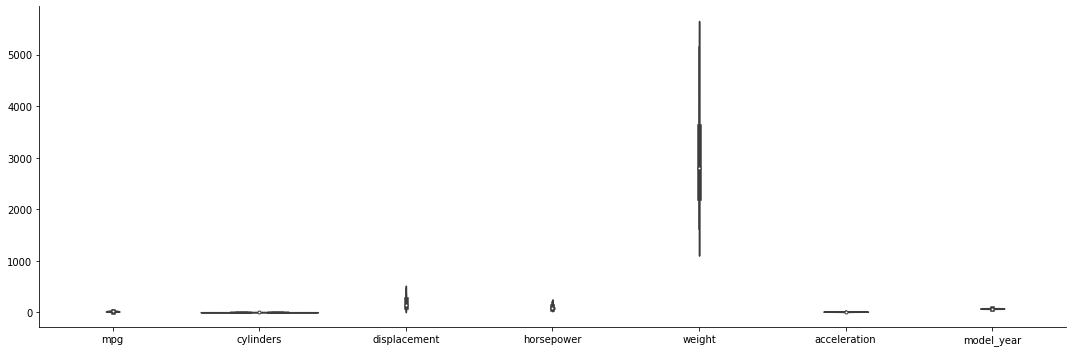

In [76]:
# catplot으로 violinplot 그리기
# df 전체를 넣고 시각화하기
sns.catplot(data = df, kind="violin", aspect = 3)